In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [ ]:
insurance = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRa1wWwXmzxEvqITxj4OQTeLywlGTTsOTbhSRqKj2lPuGefjlci-DQhgLBPpgWXe8AAUu2WUBqY59X1/pub?gid=1030172542&single=true&output=csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


### Q-1: What is the probability distribution of age in the insurance dataset?

#### Solution :
To find the probability distribution of age, we can plot a histogram and fit a probability density function (PDF) to it using Kernel Density Estimation (KDE) as follows:

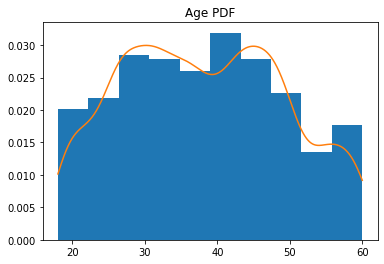

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Load data
df = insurance

# Plot histogram of age
plt.hist(df['age'], density=True)

# Fit KDE to age data
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df['age'].dropna().to_numpy().reshape(-1, 1))

# Evaluate PDF over age range
age_range = np.linspace(df['age'].min(), df['age'].max(), 1000)
pdf = np.exp(kde.score_samples(age_range.reshape(-1, 1)))

# Plot PDF
plt.plot(age_range, pdf)
plt.title('Age PDF')
plt.show()


### Q-2: What is the probability of a patient having a BMI greater than 30?

In [ ]:
# Solution


We can calculate the probability of a patient having a BMI greater than 30 by counting the number of patients with a BMI greater than 30 and dividing by the total number of patients in the dataset.

In [ ]:
bmi_greater_than_30 = insurance[insurance['bmi'] > 30]
probability_bmi_greater_than_30 = len(bmi_greater_than_30) / len(insurance)
print(probability_bmi_greater_than_30)


0.5216417910447761


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

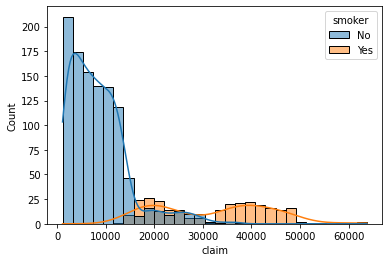

In [ ]:
sns.histplot(df, x='claim', kde=True, hue='smoker')

* Claim for non smoker is lesser than smokers.
* Most Claims of non smokers lies in range 0-15000, and Smoker's claims are greater than 15000

### Q-3: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

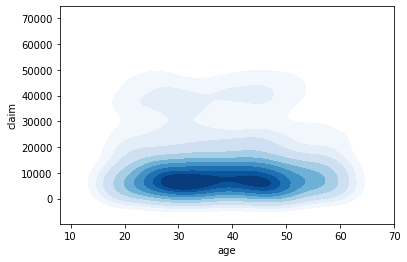

In [ ]:
sns.kdeplot(x=insurance['age'], y=insurance['claim'], cmap="Blues", thresh=0.05, fill=True)

### Q-4: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

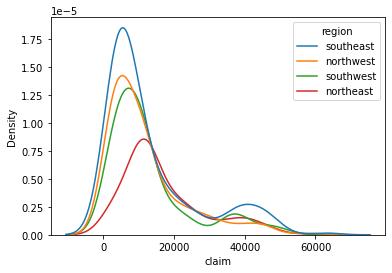

In [ ]:
sns.kdeplot(df, x='claim',hue='region')

* Leaving northeast, all other regions have high density around same claim amount.
* All regions follow same trends of claims, global peak around 6000-10000 and a local peak around 4000

### Q5: Plot PDF and CDF of claim in insurance data

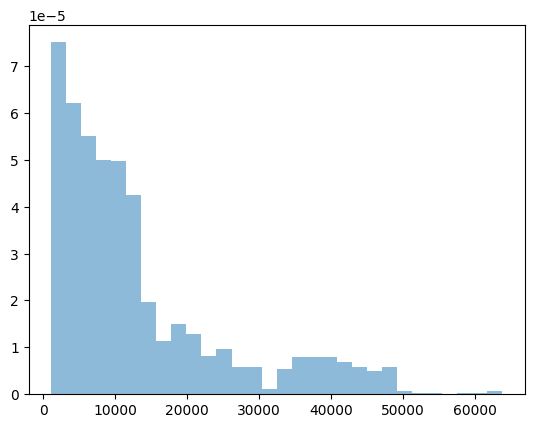

In [ ]:
# Approach 1 - Histogram approach to which distribution follows
claim_data = insurance.claim
bins = 30  # Number of bins for histogram
density, bins, _ = plt.hist(claim_data, bins=bins, density=True, alpha=0.5)

* As above hist plot is not nirmal we are gong with non parametric approach.

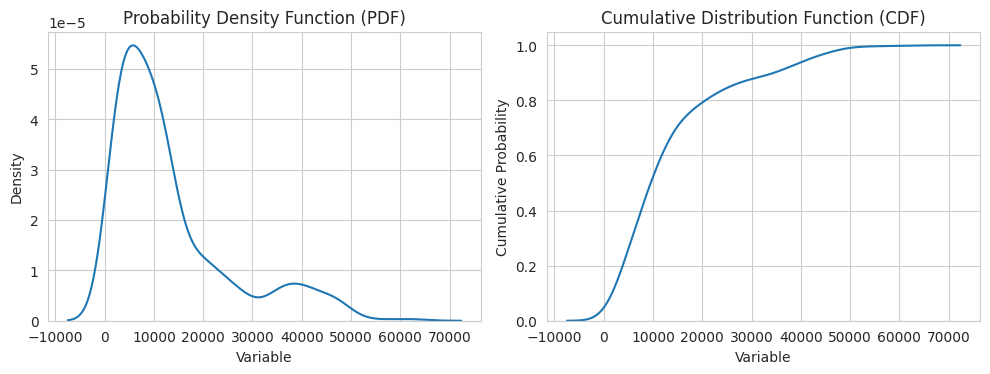

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data (replace with your actual data)
data = claim_data


plt.figure(figsize=(10, 4))

# Plot PDF using KDE
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF)')

# Plot CDF using cumulative sum of KDE
plt.subplot(1, 2, 2)
sns.kdeplot(data, cumulative=True)
plt.xlabel('Variable')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
# NOn Parametric Approach

### Q-6: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

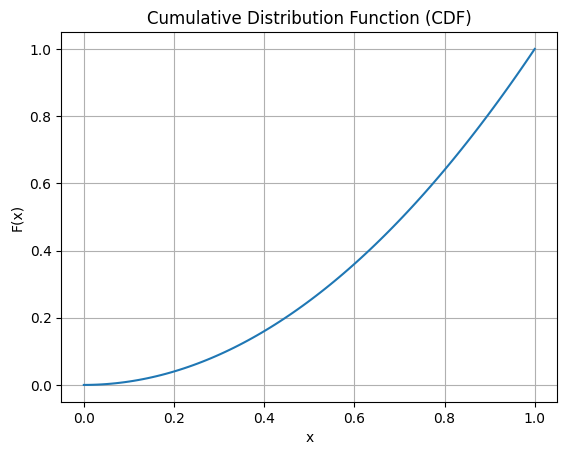

Probability that X is greater than 0.5: 0.75


In [ ]:
# Solution

import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function (PDF)
def pdf(x):
    if 0 <= x <= 1:
        return 2 * x
    else:
        return 0

# Define the cumulative distribution function (CDF)
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x ** 2
    else:
        return 1

# Generate a range of x values from 0 to 1
x = np.linspace(0, 1, 100)

# Calculate the corresponding CDF values
y_cdf = np.array([cdf(xi) for xi in x])

# Plot the CDF
plt.plot(x, y_cdf)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()

# Calculate the probability that X is greater than 0.5
p_x_gt_0_5 = 1 - cdf(0.5)
print("Probability that X is greater than 0.5:", p_x_gt_0_5)


### Q-7: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

### Solution
The probability density function (PDF) of a normal distribution with mean μ and standard deviation σ is given by:

`f(x) = (1 / (σ * sqrt(2 * π))) * exp(-(x - μ)^2 / (2 * σ^2))`



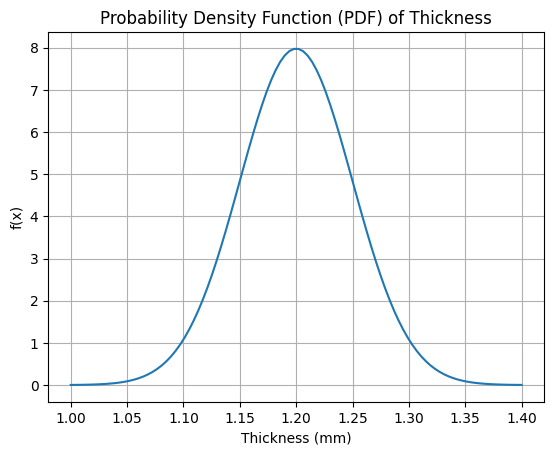

Probability that the thickness is between 1.1 mm and 1.3 mm: 0.9544997361036409


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the parameters of the normal distribution
mean = 1.2
std_dev = 0.05

# Define the probability density function (PDF) for normal distribution
def pdf(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# Generate a range of x values from 1.0 mm to 1.4 mm
x = np.linspace(1.0, 1.4, 100)

# Calculate the corresponding PDF values
y_pdf = pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, y_pdf)
plt.xlabel('Thickness (mm)')
plt.ylabel('f(x)')
plt.title('Probability Density Function (PDF) of Thickness')
plt.grid(True)
plt.show()

# Calculate the probability that the thickness is between 1.1 mm and 1.3 mm
lower_bound = 1.1
upper_bound = 1.3
p_between_1_1_and_1_3 = integrate.quad(lambda x: pdf(x, mean, std_dev), lower_bound, upper_bound)[0]
print("Probability that the thickness is between 1.1 mm and 1.3 mm:", p_between_1_1_and_1_3)


[CDF of Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) : 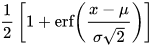

In [ ]:
# Define the CDF function for normal distribution
def cdf(x, mean, std_dev):
    return (1 + np.math.erf((x - mean) / (std_dev * np.sqrt(2)))) / 2

cdf(1.3, mean, std_dev) - cdf(1.1, mean, std_dev)

0.9544997361036416

### Q-8 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

#### Solution:

Choosing the best bandwidth for KDE involves finding a balance between overfitting and underfitting. If the bandwidth is too small, the estimated PDF may have a lot of small, spurious oscillations or noise, which may not accurately represent the underlying distribution of the data. On the other hand, if the bandwidth is too large, the estimated PDF may be overly smooth and may not capture the finer details or variations in the data.

There are several methods that can be used to select the optimal bandwidth for KDE, including cross-validation, rule-of-thumb methods (e.g., Scott's rule, Silverman's rule), and optimization techniques (e.g., maximum likelihood estimation).

One common rule-of-thumb method for choosing the bandwidth in KDE is Scott's rule, which is given by:

`h = 1.06 * sigma * n^(-1/5)`

where `h` is the bandwidth, sigma is the standard deviation of the data, and `n` is the number of data points in the sample. Scott's rule is often used as a default bandwidth choice in many KDE implementations.

In [ ]:
# Cross validation approach
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Generate a sample of 100 ages
ages = np.random.normal(loc=40, scale=10, size=100)

# Define the range of bandwidths to test
bandwidths = 10 ** np.linspace(-1, 1, 100)

# Define the parameters for the kernel density estimator
params = {'bandwidth': bandwidths, 'kernel': ['gaussian']}

# Create a GridSearchCV object to find the best bandwidth
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(ages.reshape(-1, 1))

# Extract the best bandwidth from the GridSearchCV object
best_bandwidth = grid.best_estimator_.bandwidth
print('Best bandwidth:', best_bandwidth)


Best bandwidth: 4.750810162102798


In [ ]:
# Scott rule bandwidth
# h = 1.06 * sigma * n^(-1/5)
h = 1.06 * 10 * (100**(-1/5))
print("Scott rule bandwidth:", h)

Scott rule bandwidth: 4.219936007867071
